<a href="https://colab.research.google.com/github/Rishimithan10/ChurnPrediction/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/Customer_Churn.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df=df.drop(columns="customerID")

In [ ]:
X=df.columns

In [ ]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [ ]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [ ]:
df.shape

(7043, 20)

In [ ]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)

In [ ]:
numerical_data=["tenure","MonthlyCharges","TotalCharges"]
categorical_data=[]
for col in df.columns:
    if col not in numerical_data:
        categorical_data.append(col)

In [ ]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [ ]:
df['SeniorCitizen']=df["SeniorCitizen"].map({1:'Yes',0:'No'})

In [ ]:
numerical_data

['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
categorical_data.remove("Churn")
categorical_data

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
import seaborn as sns

In [ ]:
numerical_cols=Pipeline(steps=[("nums",StandardScaler())])

In [ ]:
categorical_cols=Pipeline(steps=[("cats",OneHotEncoder(handle_unknown="ignore"))])

In [ ]:
preprocessing=ColumnTransformer(transformers=[("num_transformers",numerical_cols,numerical_data),("cat_transformers",categorical_cols,categorical_data)])

In [ ]:
#RandomForestClassifier

In [ ]:
random_forest=Pipeline(steps=[("preprocessing",preprocessing),("model",RandomForestClassifier(n_estimators=300,oob_score=True,n_jobs=-1,random_state=42))])

In [ ]:
X=df.drop(columns="Churn")
y=df["Churn"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
param_dist = {
    'model__n_estimators': [100, 200, 400, 600],
    'model__max_depth': [None, 5, 10, 15, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2', None],
    'model__bootstrap': [True, False]
}
randomforest_search=search = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42,
    verbose=2
)

In [ ]:
randomforest_search.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
70 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **l

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num_transformers',
                                                                               Pipeline(steps=[('nums',
                                                                                                StandardScaler())]),
                                                                               ['tenure',
                                                                                'MonthlyCharges',
                                                                                'TotalCharges']),
                                                                              ('cat_transformers',
                                                                               Pipeline(steps=[('cats',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['gender',
                                                                                'SeniorCitizen',
                                                                                'Partner',
                                                                                'Dependents',
                                                                                'PhoneSe...
                                                                     n_jobs=-1,
                                                                     oob_score=True,
                                                                     random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__bootstrap': [True, False],
                                        'model__max_depth': [None, 5, 10, 15,
                                                             20],
                                        'model__max_features': ['sqrt', 'log2',
                                                                None],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [100, 200, 400,
                                                                600]},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
y_pred=randomforest_search.predict(X_test)

In [ ]:
randomforest_search.best_score_

np.float64(0.8035555555555556)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1033
         Yes       0.65      0.47      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
#XGBoostClassifier

In [ ]:
xgboost_model=Pipeline(steps=[("preprocessing",preprocessing),("model",XGBClassifier(n_estimators=100,max_depth=5,learning_rate=0.1))])

In [ ]:
y_encoder=LabelEncoder()
y_encoded=y_encoder.fit_transform(y)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=42)

In [ ]:
xgboost_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_transformers',
                                                  Pipeline(steps=[('nums',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat_transformers',
                                                  Pipeline(steps=[('cats',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetSe...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
y_xgboost_pred=xgboost_model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_xgboost_pred)

0.7903340440653873

In [ ]:
param_dist = {
    'model__n_estimators': [200, 400, 600],
    'model__max_depth': [3, 5, 7, 9],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__gamma': [0, 0.1, 0.2],
    'model__min_child_weight': [1, 3, 5]
}

search_xgboost = RandomizedSearchCV(
    xgboost_model,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42
)

search_xgboost.fit(X, y_encoded)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num_transformers',
                                                                               Pipeline(steps=[('nums',
                                                                                                StandardScaler())]),
                                                                               ['tenure',
                                                                                'MonthlyCharges',
                                                                                'TotalCharges']),
                                                                              ('cat_transformers',
                                                                               Pipeline(steps=[('cats',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['gender',
                                                                                'SeniorCitizen',
                                                                                'Partner',
                                                                                'Dependents',
                                                                                'PhoneSe...
                                                            n_jobs=None,
                                                            num_parallel_tree=None, ...))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__colsample_bytree': [0.6, 0.8,
                                                                    1.0],
                                        'model__gamma': [0, 0.1, 0.2],
                                        'model__learning_rate': [0.01, 0.05,
                                                                 0.1],
                                        'model__max_depth': [3, 5, 7, 9],
                                        'model__min_child_weight': [1, 3, 5],
                                        'model__n_estimators': [200, 400, 600],
                                        'model__subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy')

In [ ]:
search_xgboost.best_score_

np.float64(0.806312271198367)

In [ ]:
search_xgboost.best_params_

{'model__subsample': 0.6,
 'model__n_estimators': 600,
 'model__min_child_weight': 1,
 'model__max_depth': 3,
 'model__learning_rate': 0.01,
 'model__gamma': 0.1,
 'model__colsample_bytree': 0.6}

In [ ]:
cm=confusion_matrix(y_test,y_xgboost_pred)

<Axes: >

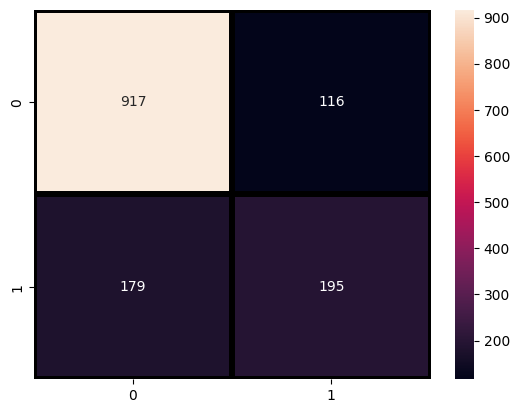

In [ ]:
sns.heatmap(cm,annot=True,fmt="d",linecolor="k",linewidth=3)

In [ ]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [ ]:
df["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [ ]:
data={
    "gender":"Female",
    "SeniorCitizen":"Yes",
    "Partner":"No",
    "Dependents":"Yes",
    "tenure":3,
    "PhoneService":"Yes",
    "MultipleLines":"No phone service",
    "InternetService":"DSL",
    "OnlineSecurity":"Yes",
    "OnlineBackup":"Yes",
    "DeviceProtection":"No",
    "TechSupport":"No",
    "StreamingTV":"No",
    "StreamingMovies":"No",
    "Contract":"Month-to-month",
    "PaperlessBilling":"No",
    "PaymentMethod":"Electronic check",
    "MonthlyCharges":30,
    "TotalCharges":90
}

In [ ]:
data

{'gender': 'Female',
 'SeniorCitizen': 'Yes',
 'Partner': 'No',
 'Dependents': 'Yes',
 'tenure': 3,
 'PhoneService': 'Yes',
 'MultipleLines': 'No phone service',
 'InternetService': 'DSL',
 'OnlineSecurity': 'Yes',
 'OnlineBackup': 'Yes',
 'DeviceProtection': 'No',
 'TechSupport': 'No',
 'StreamingTV': 'No',
 'StreamingMovies': 'No',
 'Contract': 'Month-to-month',
 'PaperlessBilling': 'No',
 'PaymentMethod': 'Electronic check',
 'MonthlyCharges': 30,
 'TotalCharges': 90}

In [ ]:
input_data=pd.DataFrame(data,index=[0])

In [ ]:
randomforest_search.predict(input_data)

array(['No'], dtype=object)

In [ ]:
xgboost_model.predict(input_data)

array([0])